In [40]:
import pandas as pd
import sqlite3

In [41]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [42]:
import matplotlib.pyplot as plt

In [43]:
%matplotlib inline

In [78]:
db_file = 'federalist.db'
# db_file = '../2019-02-21_Lab06/moby.db'
with sqlite3.connect(db_file) as db:
    tokens = pd.read_sql("SELECT * FROM token", db)
    dtm = pd.read_sql("SELECT * FROM dtm_tfidf", db)

In [108]:
labels = tokens.groupby(['chap_num']).token_str.apply(lambda x: ' '.join(x)[16:60]).tolist()

In [102]:
M = dtm.set_index(['chap_num', 'term_id']).term_weight.unstack()

In [119]:
Z = sch.linkage(pdist(M, metric='jaccard'), method='ward')

In [120]:
# Z

<Figure size 432x288 with 0 Axes>

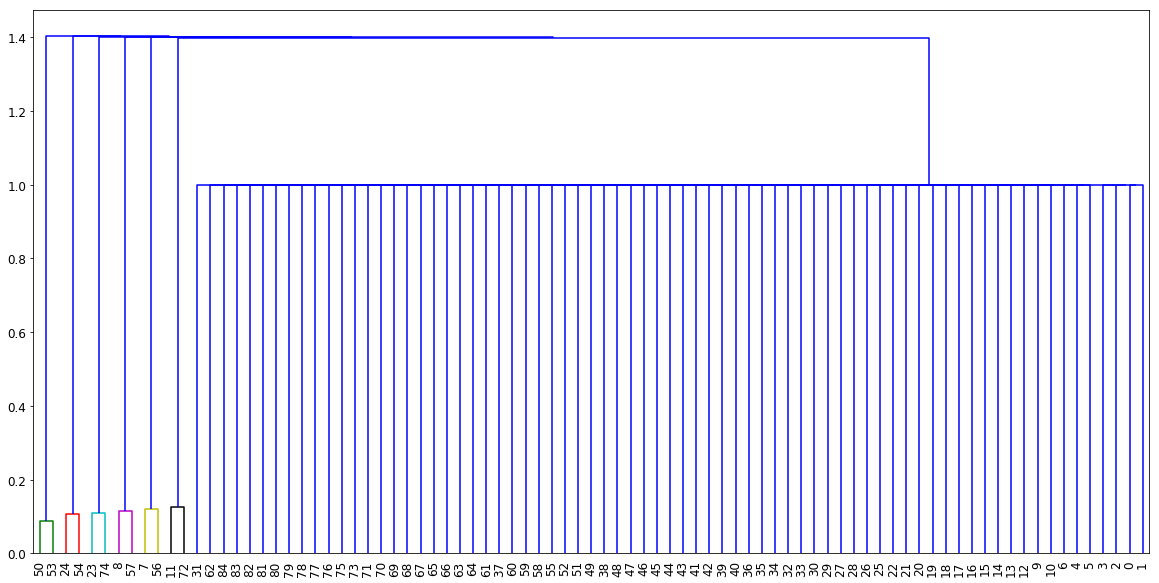

In [121]:
plt.figure()
fig, axes = plt.subplots(figsize=(20, 10))
tree = sch.dendrogram(Z)
plt.tick_params(axis='both', which='major', labelsize=12)
# axes.set_xticklabels(labels)

In [114]:
labels

['1 General Introduction For the Independent J',
 '2 Concerning Dangers from Foreign Force and ',
 '3 The Same Subject Continued ( Concerning Da',
 '4 The Same Subject Continued ( Concerning Da',
 '5 The Same Subject Continued ( Concerning Da',
 '6 Concerning Dangers from Dissensions Betwee',
 '7 The Same Subject Continued ( Concerning Da',
 '8 The Consequences of Hostilities Between th',
 '9 The Union as a Safeguard Against Domestic ',
 '10 The Same Subject Continued ( The Union as',
 '11 The Utility of the Union in Respect to Co',
 '12 The Utility of the Union In Respect to Re',
 '13 Advantage of the Union in Respect to Econ',
 '14 Objections to the Proposed Constitution F',
 '15 The Insufficiency of the Present Confeder',
 '16 The Same Subject Continued ( The Insuffic',
 '17 The Same Subject Continued ( The Insuffic',
 '18 The Same Subject Continued ( The Insuffic',
 '19 The Same Subject Continued ( The Insuffic',
 '20 The Same Subject Continued ( The Insuffic',
 '21 Other Defects o